In [108]:
# Created by: Michael Cullen
# 08/10/2024

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression

In [110]:
df = pd.read_csv('Average-prices-2024-06.csv', header=0)  # Header=0 to use the first row as column names

print(df.head())  # Display the first few rows to verify
print(df.columns)  # Display column names

# Shuffle the data
df = shuffle(df, random_state=42)

# Define split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Calculate indices
train_end = int(train_size * len(df))
val_end = int((train_size + val_size) * len(df))

# Split the data
train_data = df[0:train_end] # start to 70%
val_data = df[train_end:val_end] # 70% - 85%
test_data = df[val_end:len(df)] # 85% - end


print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")

         Date       Region_Name  Area_Code  Average_Price  Monthly_Change  \
0  1968-04-01  Northern Ireland  N92000001    3661.485500             0.0   
1  1968-04-01           England  E92000001    3408.108064             0.0   
2  1968-04-01             Wales  W92000004    2885.414162             0.0   
3  1968-04-01          Scotland  S92000003    2844.980688             0.0   
4  1968-04-01            London  E12000007    4418.489911             0.0   

   Annual_Change  Average_Price_SA  
0            NaN               NaN  
1            NaN               NaN  
2            NaN               NaN  
3            NaN               NaN  
4            NaN               NaN  
Index(['Date', 'Region_Name', 'Area_Code', 'Average_Price', 'Monthly_Change',
       'Annual_Change', 'Average_Price_SA'],
      dtype='object')
Training set: 99256 samples
Validation set: 21269 samples
Test set: 21270 samples


In [111]:
# Filter by the region/area of interest
area_of_interest = 'London'
df_area = df[df['Region_Name'] == area_of_interest]

C:\Users\mjcul\AppData\Local\Temp\ipykernel_13224\2286944855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Date'] = pd.to_datetime(df_area['Date'])
C:\Users\mjcul\AppData\Local\Temp\ipykernel_13224\2286944855.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_area['Date_Ordinal'] = df_area['Date'].map(lambda date: date.toordinal())
c:\Users\mjcul\OneDrive\Documents\GitHub\DataScience\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRe

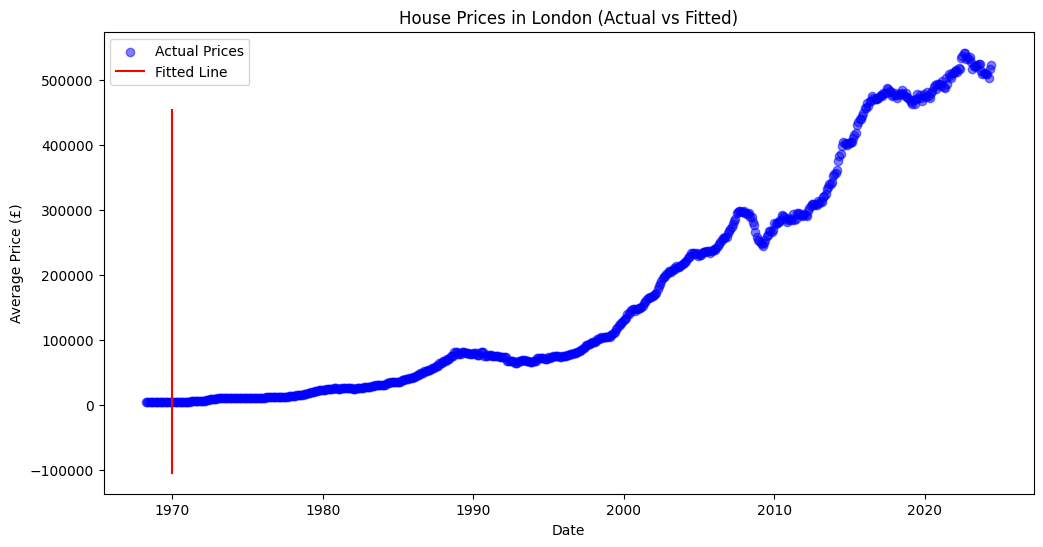

In [116]:
if df_area.empty:
    print(f"No data found for region: {area_of_interest}")
else:
    # Convert 'Date' column to datetime format
    df_area['Date'] = pd.to_datetime(df_area['Date'])

    # Convert 'Date' to ordinal values
    df_area['Date_Ordinal'] = df_area['Date'].map(lambda date: date.toordinal())

    # Prepare features and target variable
    x = df_area[['Date_Ordinal']]
    y = df_area['Average_Price']

    # Train the model
    model = LinearRegression(fit_intercept=True)
    model.fit(x, y)

    # Generate predictions over the entire date range
    xfit = np.linspace(x['Date_Ordinal'].min(), x['Date_Ordinal'].max(), 100)

    # Make predictions using xfit directly
    yfit = model.predict(xfit.reshape(-1, 1))

    # Plot the data
    plt.figure(figsize=(12, 6)) # make bigger
    plt.scatter(df_area['Date'], y, alpha=0.5, label='Actual Prices', color='blue')
    plt.plot(pd.to_datetime(xfit), yfit, color='red', label='Fitted Line')
    plt.xlabel('Date')
    plt.ylabel('Average Price (£)')
    plt.title(f'House Prices in {area_of_interest} (Actual vs Fitted)')
    plt.legend()
    plt.show()


In [113]:
# Define split sizes
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Calculate indices
train_end = int(train_size * len(df))
val_end = int((train_size + val_size) * len(df))

# Split the data
train_data = df[0:train_end] # start to 70%
val_data = df[train_end:val_end] # 70% - 85%
test_data = df[val_end:len(df)] # 85% - end


print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")

Training set: 99256 samples
Validation set: 21269 samples
Test set: 21270 samples
